> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [movie data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

The TMDB movie metadata dataset contains information on approximately 5000 movies, including their budget, revenue, director, cast, runtime, release date, and genre. The dataset is provided by TMDb (The Movie Database), a popular movie information database that contains information on movies and TV shows from around the world.

Field introduction: The dataset contains the following major fields: movie ID, title, overview, runtime, budget, revenue, director, cast, genre, production companies, production countries, language, release date, box office revenue, and rating.

Relationship between the two tables: The dataset includes two tables: movies and credits. The movies table contains basic information about the movies, while the credits table contains information about the cast and crew of the movies. These two tables are linked by the movie ID. Specifically, the ID column in the movies table is linked to the movie_id column in the credits table, allowing for comprehensive analysis of movie information.


### Question(s) for Analysis
I wanted to analyze the relationship between movie popularity and other factors, including the following:

The relationship between directors and film vote_average: Exploring the performance of films by different directors in terms of ratings and box office


The relationship between movie genre and movie vote_average: Analyze the performance of different genres in terms of ratings and box office, and explore whether audience tastes and preferences affect the vote_average of movies


The relationship between release time and movie vote_average: Explore the relationship between release time and movie vote_average

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
#   While optional for current notebooks, if you are having trouble with visualizations,
#   remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations initially. This does not have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, trim the excess and organize your steps so that you have a flowing, cohesive report.

In [2]:
credits = pd.read_csv(r'C:\Users\YuqiZhang\Documents\udacity\Data analyst\archive\tmdb_5000_credits.csv')
movies = pd.read_csv(r'C:\Users\YuqiZhang\Documents\udacity\Data analyst\archive\tmdb_5000_movies.csv')
credits.head(2)
movies.head(2)
# Load your data and print out a few lines. What is the size of your dataframe? 
#   Perform operations to inspect data types and look for instances of missing
#   or possibly errant data. There are at least 4 - 6 methods you can call on your
#   dataframe to obtain this information.


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


## Modification 1

I build a function to merge two data sources. If I want to merge other data sources, I can use this function again.

In [3]:
# 将两个表按照id列和movie_id列连接起来
def merge_data(data_source_1,column_1,data_source_2,column_2):
    data = pd.merge(data_source_1, data_source_2, left_on=column_1, right_on=column_2)
    data.columns.unique()
    print(type(data))
merge_data(movies,'id',credits,'movie_id')

<class 'pandas.core.frame.DataFrame'>


In [4]:
data.head(2)
# 演员，导演前10个，电影类型，时间，评分，票房

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title_x,vote_average,vote_count,movie_id,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [5]:
# Select columns used to this task
np.array(data["cast"]).shape[0]
data_ = []
for i in range(np.array(data["cast"]).shape[0]):
    
    if len(eval(data["cast"][i])) <5 or len([d['name'] for d in eval(data["crew"][i]) if d['job'] == 'Director']) == 0 or\
    eval(data["genres"][i]) == [] or data["vote_count"][i] <1000  :
        data = data.drop(i)
        continue
    actor_ = [i]
#     print(data["id"][i])
    actor_.append(data["original_title"][i])
    actor_.append(data["popularity"][i])
    actor_.append(data["revenue"][i])
    typee = []
    for j in range(5):
        typee.append(eval(data["cast"][i])[j]["name"])
    actor_.append(typee)
    
    director_name = [d['name'] for d in eval(data["crew"][i]) if d['job'] == 'Director']
    actor_.append(director_name[0])
    type_ = []
    for j in range(len(eval(data["genres"][i]))):
        type_.append(eval(data["genres"][i])[j]["name"])
    actor_.append(type_)
    actor_.append(data["vote_average"][i])
    actor_.append(data["vote_count"][i])
    actor_.append(eval("'" + data["release_date"][i] + "'"))
    data_.append(actor_)
# print(data_)


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [6]:
# In the last cell, "if len(eval(data["cast"][i])) <5 or len([d['name'] for d in 
# eval(data["crew"][i]) if d['job'] == 'Director']) == 0 or eval(data["genres"][i])
# == [] or data["vote_count"][i] <1000", This if code has helped me to delete rows that has imcomplete actor's 
# information, no directors, no grnres, and invalid vote_average.

# Determines if there are any null values
data_ = pd.DataFrame(data_)
has_nan = data_.isna().any().any()
print(has_nan)

False


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. Remember to utilize the visualizations that the pandas library already has available.



> **Tip**: Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1 (The relationship between directors and film vote_average)

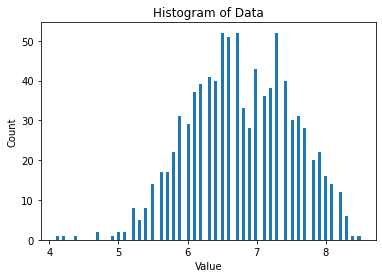

In [7]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
# [0, 'Avatar', 150.437577, 2787965087, ['Sam Worthington', 'Zoe Saldana', 'Sigourney Weaver', 'Stephen Lang', 'Michelle Rodriguez'], 
# 'James Cameron', ['Action', 'Adventure', 'Fantasy', 'Science Fiction'], 7.2, 11800]
#

data_ = np.array(data_)
# 计算数据的直方图
hist, bins = np.histogram(data_[:,7], bins=100)

# 绘制直方图
plt.hist(np.array(data_[:,7]), bins=bins)

# 添加标签和标题
plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Histogram of Data')

# 显示图形
plt.show()

# The ratings follow a normal distribution

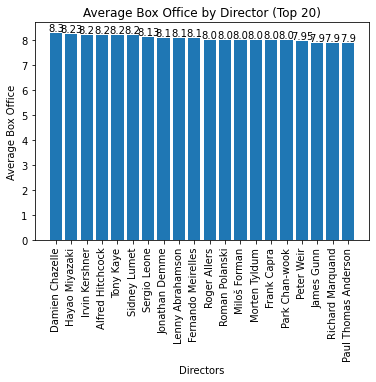

In [8]:
# Top 20 directors in the field of vote_avarage
directors = [row[5] for row in data_]
box_office = [row[7] for row in data_]

# 统计每个导演对应的电影票房均值
director_box_office = {}
for i in range(len(directors)):
    director = directors[i]
    box_office_value = box_office[i]
    if director not in director_box_office:
        director_box_office[director] = [box_office_value]
    else:
        director_box_office[director].append(box_office_value)

for director in director_box_office:
    director_box_office[director] = np.mean(director_box_office[director])

# 按照值对字典进行排序
sorted_director_box_office = dict(sorted(director_box_office.items(), key=lambda x: x[1], reverse=True))

# 取出前20个数据
top20_director_box_office = dict(list(sorted_director_box_office.items())[:20])

# 绘制柱状图
plt.bar(range(len(top20_director_box_office)), list(top20_director_box_office.values()), align='center')
plt.xticks(range(len(top20_director_box_office)), list(top20_director_box_office.keys()), rotation=90)
plt.xlabel('Directors')
plt.ylabel('Average Box Office')
plt.title('Average Box Office by Director (Top 20)')

# 显示每列的数值
for i, (k, v) in enumerate(sorted_director_box_office.items()):
    if i >= 20:
        break
    plt.text(i, v, str(round(v, 2)), ha='center', va='bottom')
plt.show()

## Modification 2: Adding Reasoning Analysis

If I set the standard is 8, directors will be divided into 2 groups. The group with 8+ can be called "good directors" and the other group is "not good enough directors"

### Research Question 2  (The relationship between movie genre and movie vote_average)

In [9]:
# Get a matrix that shows [genre, the number of genre, vote_average of this genre]

# 展开第七列list
genres = [genre for movie in data_ for genre in movie[6]]

# 记录每个流派对应的第八列的值
ratings = [movie[7] for movie in data_ for genre in movie[6]]

# 将两个列表合并为一个数据框
df = pd.DataFrame({'Genre': genres, 'Rating': ratings})

# 按照Genre列进行分组，并计算每组的数量和均值
grouped = df.groupby('Genre').agg({'Rating': ['count', 'mean']})

# 将分组后的数据框转换为列表
result = []
for index, row in grouped.iterrows():
    genre = index
    count = row[('Rating', 'count')]
    mean = row[('Rating', 'mean')]
    result.append([genre, count, mean])

# 输出结果
print(result)

[['Action', 355.0, 6.529577464788733], ['Adventure', 296.0, 6.597297297297297], ['Animation', 92.0, 6.833695652173914], ['Comedy', 252.0, 6.592063492063493], ['Crime', 151.0, 6.935761589403973], ['Drama', 336.0, 7.127976190476191], ['Family', 135.0, 6.771111111111111], ['Fantasy', 164.0, 6.550609756097561], ['History', 27.0, 7.148148148148148], ['Horror', 74.0, 6.562162162162163], ['Music', 15.0, 6.8933333333333335], ['Mystery', 82.0, 6.9158536585365855], ['Romance', 115.0, 6.819999999999999], ['Science Fiction', 203.0, 6.594088669950739], ['TV Movie', 1.0, 6.1], ['Thriller', 287.0, 6.720557491289198], ['War', 31.0, 7.248387096774193], ['Western', 13.0, 7.053846153846154]]


In [10]:
print(result)

[['Action', 355.0, 6.529577464788733], ['Adventure', 296.0, 6.597297297297297], ['Animation', 92.0, 6.833695652173914], ['Comedy', 252.0, 6.592063492063493], ['Crime', 151.0, 6.935761589403973], ['Drama', 336.0, 7.127976190476191], ['Family', 135.0, 6.771111111111111], ['Fantasy', 164.0, 6.550609756097561], ['History', 27.0, 7.148148148148148], ['Horror', 74.0, 6.562162162162163], ['Music', 15.0, 6.8933333333333335], ['Mystery', 82.0, 6.9158536585365855], ['Romance', 115.0, 6.819999999999999], ['Science Fiction', 203.0, 6.594088669950739], ['TV Movie', 1.0, 6.1], ['Thriller', 287.0, 6.720557491289198], ['War', 31.0, 7.248387096774193], ['Western', 13.0, 7.053846153846154]]


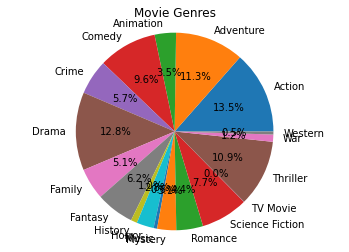

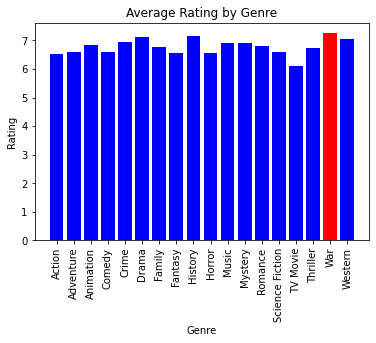

In [11]:
# This figure shows the percentage of different genres and the vote_avreage in different genres



# 根据结果第1列和第2列做饼图
labels = [row[0] for row in result]
sizes = [row[1] for row in result]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Movie Genres')
plt.show()

# 根据结果第1列和第3列做柱状图
labels = [row[0] for row in result]
values = [row[2] for row in result]
colors = ['red' if value == max(values) else 'blue' for value in values]
plt.bar(labels, values, color=colors)
plt.title('Average Rating by Genre')
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.xticks(rotation=90)  # 旋转横坐标标签
plt.show()

## Modification 3: Adding Reasoning Analysis

This set of images represents the percentage of movies in each genre and the corresponding average score. It can be seen from the figure that war has the highest score and Drama has the largest proportion. As you can see from the figure, the proportion is not correlated with the score.

### Research Question 3  (The relationship between release time and movie vote_average)

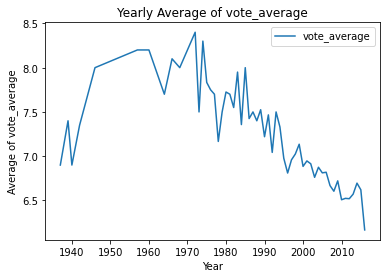

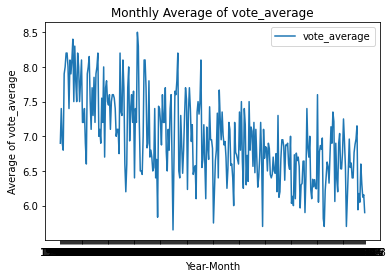

In [12]:
# These figures shows the time-series data of vote_average. The first is year by year. The second is all time.

# 获取时间和第八列数据
time_ = []
data_8 = []
for row in data_:
    if len(row) >= 10:
        time_.append(datetime.strptime(row[9], '%Y-%m-%d'))
        data_8.append(row[7])
# print(data_8)
# 提取年份和月份信息
years = [time.year for time in time_]
months = [time.month for time in time_]

# 统计每个年份对应的第八列平均值
year_data_8 = {}
for i in range(len(years)):
    year = years[i]
    value = data_8[i]
    if year not in year_data_8:
        year_data_8[year] = [value]
    else:
        year_data_8[year].append(value)
for year in year_data_8:
    year_data_8[year] = sum(year_data_8[year]) / len(year_data_8[year])

# 按照年份顺序对字典进行排序
sorted_year_data_8 = dict(sorted(year_data_8.items(), key=lambda x: x[0]))

# 绘制年份折线图
plt.plot(sorted_year_data_8.keys(), sorted_year_data_8.values(), label='vote_average')
plt.xlabel('Year')
plt.ylabel('Average of vote_average')
plt.title('Yearly Average of vote_average')
plt.legend()
plt.show()

# 统计每个月份对应的第八列平均值
month_data_8 = {}
for i in range(len(months)):
    year_month = f'{years[i]}-{months[i]:02d}'
    value = data_8[i]
    if year_month not in month_data_8:
        month_data_8[year_month] = [value]
    else:
        month_data_8[year_month].append(value)
for year_month in month_data_8:
    month_data_8[year_month] = sum(month_data_8[year_month]) / len(month_data_8[year_month])

# 按照时间顺序对字典进行排序
sorted_month_data_8 = dict(sorted(month_data_8.items(), key=lambda x: x[0]))

# 绘制月份折线图
plt.plot(sorted_month_data_8.keys(), sorted_month_data_8.values(), label='vote_average')
plt.xlabel('Year-Month')
plt.ylabel('Average of vote_average')
plt.title('Monthly Average of vote_average')
plt.legend()
plt.show()

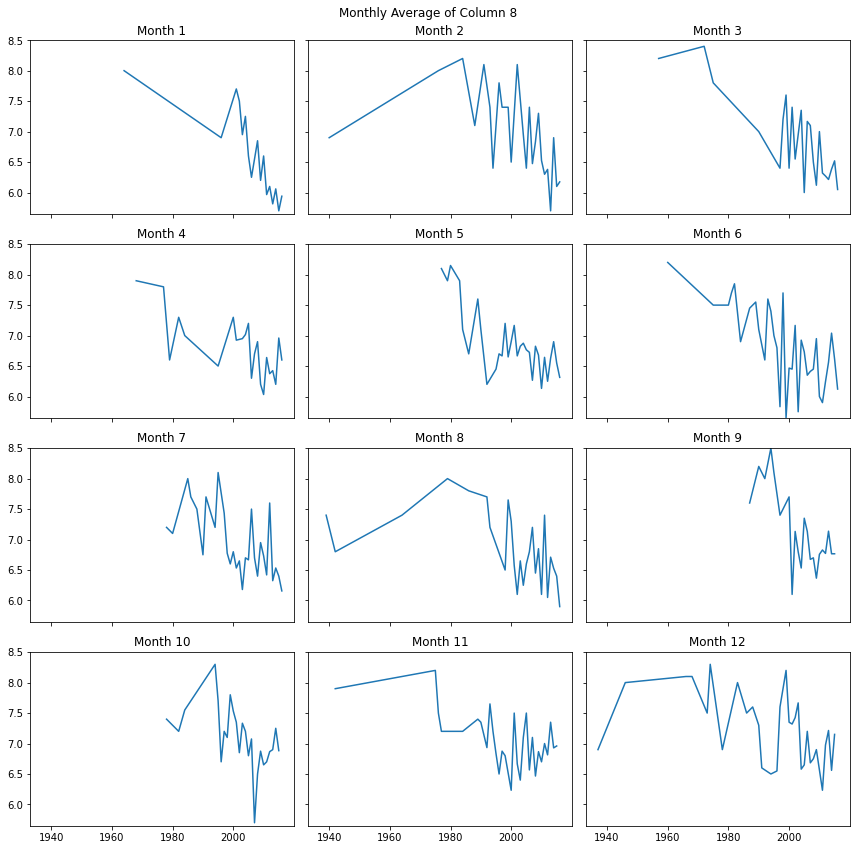

In [13]:
# This group of figures shows the time-series vote_average by every month.

# 获取时间和第九列数据
time_ = []
data_8 = []
for row in data_:
    if len(row) >= 10:
        time_.append(datetime.strptime(row[9], '%Y-%m-%d'))
        data_8.append(row[7])

# 提取年份和月份信息
years = [time.year for time in time_]
months = [time.month for time in time_]

# 按照年份和月份统计第八列数据
year_month_data_8 = {}
for i in range(len(years)):
    year = years[i]
    month = months[i]
    value = data_8[i]
    if year not in year_month_data_8:
        year_month_data_8[year] = {}
    if month not in year_month_data_8[year]:
        year_month_data_8[year][month] = [value]
    else:
        year_month_data_8[year][month].append(value)

# 按照时间顺序对字典进行排序
sorted_year_month_data_8 = {k: dict(sorted(v.items(), key=lambda x: x[0])) for k, v in sorted(year_month_data_8.items(), key=lambda x: x[0])}

# 绘制每年 1-12 月份第八列平均值的折线图
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(12, 12), sharex=True, sharey=True)
i = 0
ymin = float('inf')
ymax = float('-inf')
for row in axs:
    for ax in row:
        i += 1
        if i > 12:
            break
        month_data = {}
        for year in sorted_year_month_data_8:
            if i in sorted_year_month_data_8[year]:
                month_data[year] = sum(sorted_year_month_data_8[year][i]) / len(sorted_year_month_data_8[year][i])
        ax.plot(month_data.keys(), month_data.values())
        ax.set_title(f'Month {i}')
        ymin = min(ymin, min(month_data.values()))
        ymax = max(ymax, max(month_data.values()))
plt.suptitle('Monthly Average of Column 8')
plt.tight_layout()
for row in axs:
    for ax in row:
        ax.set_ylim(ymin, ymax)
plt.show()

<a id='conclusions'></a>
## Conclusions

For question 1, from the vote_averge's perpective, the directors can be divided into two groups that is "good directors" and "not good enough directors". The conclusion is not similar with my expection. Some movies maybe not good enough, that still hava valid vote_average. The limitation is that I don't combine directors and actors to find out the star pair.  


For question 2, "Drama", "Adventure" and "Thriller" are top 3 the number of genres. However "War" and "History" are top 2 the vote_average. So the number of different genres is not related to the vote_average.


For question 3, in terms of time, the vote_average showed an overall downward trend, with the peaks in the early 1970s and early 1980s. From the perspective of months, the vote_average in Christmas (December) is basically stable, and the level is the highest.

## Modification 4: Adding Limitations

Limitation 1: Some movies are not in the dataset, so the results only can represent these 5000 movies. If I want to make the results more common, I should collect more information of movies and enlarge the dataset.

Limitation 2: For question 1, the limitation is that I don't combine directors and actors to find out the star pair.

> **Tip**: Finally, summarize your findings and the results that have been performed in relation to the question(s) provided at the beginning of the analysis. Summarize the results accurately, and point out where additional research can be done or where additional information could be useful.

> **Tip**: Make sure that you are clear with regards to the limitations of your exploration. You should have at least 1 limitation explained clearly. 

> **Tip**: If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should see output that starts with `NbConvertApp] Converting notebook`, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [14]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] Writing 631687 bytes to Investigate_a_Dataset.html
